# Recommendations Worth a Million: An Introduction to Clustering

<img src="images/netflix.jpg"/>

In [1]:
# Load the dataset
movies = read.table("data/movieLens.txt", header=FALSE, sep="|",quote="\"") # Our data doesn't have a header.

head(movies,3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
,<int>,<fct>,<fct>,<lgl>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,Toy Story (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0,0,1,1,⋯,0,0,0,0,0,0,0,0,0,0
2,2,GoldenEye (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?GoldenEye%20(1995),0,1,1,0,0,⋯,0,0,0,0,0,0,0,1,0,0
3,3,Four Rooms (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995),0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0


In [2]:
str(movies)

'data.frame':	1682 obs. of  24 variables:
 $ V1 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ V2 : Factor w/ 1664 levels "'Til There Was You (1997)",..: 1525 618 555 594 344 1318 1545 111 391 1240 ...
 $ V3 : Factor w/ 241 levels "","01-Aug-1997",..: 71 71 71 71 71 71 71 71 71 182 ...
 $ V4 : logi  NA NA NA NA NA NA ...
 $ V5 : Factor w/ 1661 levels "","http://us.imdb.com/M/title-exact/Independence%20(1997)",..: 1431 565 505 543 310 1661 1453 103 357 1183 ...
 $ V6 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ V7 : int  0 1 0 1 0 0 0 0 0 0 ...
 $ V8 : int  0 1 0 0 0 0 0 0 0 0 ...
 $ V9 : int  1 0 0 0 0 0 0 0 0 0 ...
 $ V10: int  1 0 0 0 0 0 0 1 0 0 ...
 $ V11: int  1 0 0 1 0 0 0 1 0 0 ...
 $ V12: int  0 0 0 0 1 0 0 0 0 0 ...
 $ V13: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V14: int  0 0 0 1 1 1 1 1 1 1 ...
 $ V15: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V16: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V17: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V18: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V19: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V20: int  0 0 0 0 0 0 0 0 

In [3]:
# Add column names

colnames(movies) = c("ID", "Title", "ReleaseDate", "VideoReleaseDate", "IMDB", "Unknown", "Action", "Adventure", "Animation", 
                     "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "FilmNoir", "Horror", "Musical", 
                     "Mystery", "Romance", "SciFi", "Thriller", "War", "Western")
head(movies,3)

,ID,Title,ReleaseDate,VideoReleaseDate,IMDB,Unknown,Action,Adventure,Animation,Childrens,⋯,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
,<int>,<fct>,<fct>,<lgl>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,Toy Story (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0,0,1,1,⋯,0,0,0,0,0,0,0,0,0,0
2,2,GoldenEye (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?GoldenEye%20(1995),0,1,1,0,0,⋯,0,0,0,0,0,0,0,1,0,0
3,3,Four Rooms (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995),0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0


In [4]:
str(movies)

'data.frame':	1682 obs. of  24 variables:
 $ ID              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Title           : Factor w/ 1664 levels "'Til There Was You (1997)",..: 1525 618 555 594 344 1318 1545 111 391 1240 ...
 $ ReleaseDate     : Factor w/ 241 levels "","01-Aug-1997",..: 71 71 71 71 71 71 71 71 71 182 ...
 $ VideoReleaseDate: logi  NA NA NA NA NA NA ...
 $ IMDB            : Factor w/ 1661 levels "","http://us.imdb.com/M/title-exact/Independence%20(1997)",..: 1431 565 505 543 310 1661 1453 103 357 1183 ...
 $ Unknown         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Action          : int  0 1 0 1 0 0 0 0 0 0 ...
 $ Adventure       : int  0 1 0 0 0 0 0 0 0 0 ...
 $ Animation       : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Childrens       : int  1 0 0 0 0 0 0 1 0 0 ...
 $ Comedy          : int  1 0 0 1 0 0 0 1 0 0 ...
 $ Crime           : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Documentary     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama           : int  0 0 0 1 1 1 1 1 1 1 ...
 $ Fantasy         : int  0 0 0 

In [5]:
# Remove unnecessary variables

movies$ID = NULL
movies$ReleaseDate = NULL
movies$VideoReleaseDate = NULL
movies$IMDB = NULL

head(movies,3)

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
# Take a look at our data again:
str(movies)

'data.frame':	1682 obs. of  20 variables:
 $ Title      : Factor w/ 1664 levels "'Til There Was You (1997)",..: 1525 618 555 594 344 1318 1545 111 391 1240 ...
 $ Unknown    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Action     : int  0 1 0 1 0 0 0 0 0 0 ...
 $ Adventure  : int  0 1 0 0 0 0 0 0 0 0 ...
 $ Animation  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Childrens  : int  1 0 0 0 0 0 0 1 0 0 ...
 $ Comedy     : int  1 0 0 1 0 0 0 1 0 0 ...
 $ Crime      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama      : int  0 0 0 1 1 1 1 1 1 1 ...
 $ Fantasy    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ FilmNoir   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Horror     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Musical    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Mystery    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Romance    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SciFi      : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Thriller   : int  0 1 1 0 1 0 0 0 0 0 ...
 $ War        : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Western    : int  0 0 0 0 0

In [7]:
# Remove duplicates
movies = unique(movies)

In [8]:
# Take a look at our data again:
str(movies)

'data.frame':	1664 obs. of  20 variables:
 $ Title      : Factor w/ 1664 levels "'Til There Was You (1997)",..: 1525 618 555 594 344 1318 1545 111 391 1240 ...
 $ Unknown    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Action     : int  0 1 0 1 0 0 0 0 0 0 ...
 $ Adventure  : int  0 1 0 0 0 0 0 0 0 0 ...
 $ Animation  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Childrens  : int  1 0 0 0 0 0 0 1 0 0 ...
 $ Comedy     : int  1 0 0 1 0 0 0 1 0 0 ...
 $ Crime      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama      : int  0 0 0 1 1 1 1 1 1 1 ...
 $ Fantasy    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ FilmNoir   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Horror     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Musical    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Mystery    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Romance    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SciFi      : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Thriller   : int  0 1 1 0 1 0 0 0 0 0 ...
 $ War        : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Western    : int  0 0 0 0 0

First we have to compute the distances between all data points.

In [9]:
# Compute distances
distances = dist(movies[2:20], method = "euclidean")

In [10]:
# Hierarchical clustering
clusterMovies = hclust(distances, method = "ward") 

The "ward" method has been renamed to "ward.D"; note new "ward.D2"



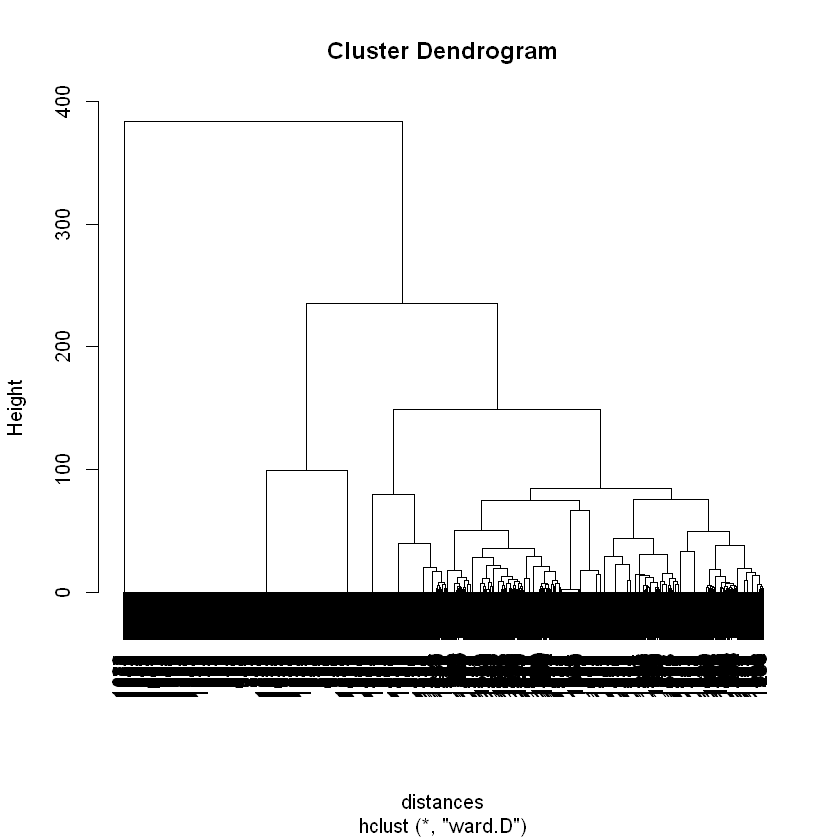

In [11]:
# Plot the dendrogram
plot(clusterMovies)

We have all this black along the bottom. Remember that the dendrogram lists all of the data points along the bottom. But when there are over 1,000 data points it's impossible to read.

In [12]:
# Assign points to clusters
clusterGroups = cutree(clusterMovies, k = 10)  # We select 10 clusters

Let's use the tapply function to compute the percentage of movies in each genre and cluster

In [13]:
tapply(movies$Action, clusterGroups, mean)

1         2         3         4         5         6         7         8 
0.1784512 0.7839196 0.1238532 0.0000000 0.0000000 0.1015625 0.0000000 0.0000000 
        9        10 
0.0000000 0.0000000

It divides our data points into the 10 clusters and then computes the average value of the action variable for each cluster.
Remember that the action variable is a binary variable with value 0 or 1. So by computing the average of this variable we're computing the percentage of movies in that cluster that belong in that genre. 

So we can see here that in cluster 2, about 78% of the movies have the action genre label, whereas in cluster 4 none of the movies are labeled as action movies.

In [14]:
tapply(movies$Romance, clusterGroups, mean)

1          2          3          4          5          6          7 
0.10437710 0.04522613 0.03669725 0.00000000 0.00000000 1.00000000 1.00000000 
         8          9         10 
0.00000000 0.00000000 0.00000000

Here we can see that all of the movies in clusters six and seven are labeled as romance movies, whereas only 4% of the movies in cluster two are labeled as romance movies.

In [15]:
# Find which cluster Men in Black is in.

subset(movies, Title=="Men in Black (1997)")

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
257,Men in Black (1997),0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [16]:
clusterGroups[257]

257 
  2

Men in Black is into cluster 2.

In [17]:
# Create a new data set with just the movies from cluster 2
cluster2 = subset(movies, clusterGroups==2)

head(cluster2)

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27,Bad Boys (1995),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,Apollo 13 (1995),0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
38,"Net, The (1995)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
53,Natural Born Killers (1994),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
54,Outbreak (1995),0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [18]:
# Look at the first 10 titles in this cluster:
cluster2$Title[1:10]

[1] GoldenEye (1995)                              
 [2] Bad Boys (1995)                               
 [3] Apollo 13 (1995)                              
 [4] Net, The (1995)                               
 [5] Natural Born Killers (1994)                   
 [6] Outbreak (1995)                               
 [7] Stargate (1994)                               
 [8] Fugitive, The (1993)                          
 [9] Jurassic Park (1993)                          
[10] Robert A. Heinlein's The Puppet Masters (1994)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)